In [1]:
import pandas as pd
import sqlite3
import emoji
from collections import Counter
from pprint import pprint

from matplotlib.pyplot import yscale, xscale, title, plot
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
def read_sql():
    df = __read_sql()
    df = __select_taipei_area(df)
    df = __clean_raw_dataframe(df)
    return df

# read raw data from sql
def __read_sql():
    con = sqlite3.connect('../data/InstagramPost.sqlite')
    con2 = sqlite3.connect('../data/InstagramPost2.sqlite')
    con3 = sqlite3.connect('../data/InstagramPost3.sqlite')
    SQL = pd.read_sql_query('select * from InstagramPost', con)
    SQL2 = pd.read_sql_query('select * from InstagramPost_table2', con)
    SQL3 = pd.read_sql_query('select * from InstagramPost_table3', con)
    SQL4 = pd.read_sql_query('select * from InstagramPost_table4', con)
    SQL5 = pd.read_sql_query('select * from InstagramPost_table2', con2)
    SQL6 = pd.read_sql_query('select * from InstagramPost', con3)

    # concat SQL tables
    SQL = pd.concat([SQL, SQL2, SQL3, SQL4, SQL5, SQL6]).drop_duplicates()
    del SQL2, SQL3, SQL4, SQL5, SQL6
    SQL['datetime'] = pd.to_datetime(SQL.date, unit='s')
    instagram2016 = SQL[SQL.datetime.dt.year == 2016]
    del SQL
    return instagram2016

# select taipei area
def __select_taipei_area(df):
    lat_min = 25.032840
    lat_max = 25.051496
    lng_min = 121.557441
    lng_max = 121.580229

    df['lat'] = df.lat.astype(float)
    df['lng'] = df.lng.astype(float)

    lat_bound = df.lat.between(lat_min, lat_max)
    lng_bound = df.lng.between(lng_min, lng_max)
    df = df[lat_bound & lng_bound]
    return df

# clean datafrome
def __clean_raw_dataframe(df):
    df = df[['location_id', 'location_name', 'lat', 'lng', 'caption', 'comments',
             'date', 'media_id', 'is_video', 'likes', 'owner_id', 'thumbnail_src',
             'display_src', 'datetime']].reset_index().drop(columns='index')
    return df

# 1. Read data

In [3]:
ig2016 = read_sql()

In [4]:
ig2016.head()

,location_id,location_name,lat,lng,caption,comments,date,media_id,is_video,likes,owner_id,thumbnail_src,display_src,datetime
0,1030274404,珍妮姐姐,25.033070,121.574303,4y9m31d\n🎃🎃🎃萬聖節不搗蛋要幹嘛.....來當小小波麗士啦！🚔🚔🚔一個好老成的交警...,0,1477722698,1371559858339338657,0,10,471686179,https://instagram.ftpe7-4.fna.fbcdn.net/t51.28...,https://instagram.ftpe7-4.fna.fbcdn.net/t51.28...,2016-10-29 06:31:38
1,1030059774,上順五金,25.045666,121.572621,殺氣⋯,0,1457411803,1201179727676509838,0,5,1656340962,https://instagram.ftpe7-4.fna.fbcdn.net/t51.28...,https://instagram.ftpe7-4.fna.fbcdn.net/t51.28...,2016-03-08 04:36:43
2,101507933273310,振新汽車,25.046841,121.572569,難搞~,0,1477923943,1373248027406267844,0,4,2932967265,https://instagram.ftpe7-4.fna.fbcdn.net/t51.28...,https://instagram.ftpe7-4.fna.fbcdn.net/t51.28...,2016-10-31 14:25:43
3,446177068734757,興雅附幼,25.046796,121.570335,下課,0,1476776608,1363623480465221748,0,11,1562058859,https://instagram.ftpe7-4.fna.fbcdn.net/t51.28...,https://instagram.ftpe7-4.fna.fbcdn.net/t51.28...,2016-10-18 07:43:28
4,982212735175733,POLA 特約店－媚莉,25.049360,121.557693,太開心了，久違的放鬆💆🏻💕,0,1462517928,1244013006589671071,0,96,43413980,https://instagram.ftpe7-3.fna.fbcdn.net/t51.28...,https://instagram.ftpe7-3.fna.fbcdn.net/t51.28...,2016-05-06 06:58:48


# 2. Group by location

In [5]:
plt.rcParams['svg.fonttype'] = 'none'

In [6]:
loc_gb = ig2016.groupby('location_name')

In [7]:
rank = (pd.DataFrame(loc_gb.size())
            .reset_index()
            .rename(columns={0:'posts'})
            .sort_index(by='posts', ascending=False)
       )

D:\Users\ronn\Anaconda3\envs\nlp\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  after removing the cwd from sys.path.


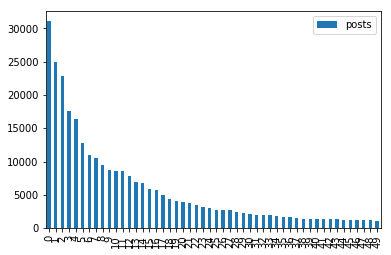

In [10]:
rank[:50].reset_index().drop(columns='index').plot.bar()
title = 'the nth location post'

In [12]:
rank[:40]

,location_name,posts
188,TAIPEI 101 MALL 台北 101 購物中心,31126
37,BELLAVITA,24917
619,松山文創園區 SCCP Taipei,22906
387,台北101觀景台,17607
21,ATT 4 FUN,16411
318,信義區商圈,12747
911,饒河街觀光夜市,10926
226,W Taipei,10531
191,TICC 台北國際會議中心,9446
827,誠品信義書店,8704


# 3. Test captions : 統一時代百貨台北店

In [18]:
ig2016[ ig2016['location_name'] == '統一時代百貨台北店' ][['datetime', 'caption']].to_csv('tongyishidai.csv', encoding='utf-8')